El siguiente codigo permite graficar las senales 

In [ ]:
import wave
import matplotlib.pyplot as plt
#%config InlineBackend.figure_formats = {'png', 'retina'}
plt.rcParams['axes.labelsize'] = 16 # fontsize for figure labels
plt.rcParams['axes.titlesize'] = 18 # fontsize for figure titles
plt.rcParams['font.size'] = 14 # fontsize for figure numbers
plt.rcParams['lines.linewidth'] = 1.4 # line width for plotting
#Function that extracts the number of recording channels, sampling rate, time and signal
#variable is the path and filename of the .wav file
def ecg(variable):
    record = wave.open(variable, 'r') # load the data
    # Get the number of channels, sample rate, etc.
    numChannels = record.getnchannels() # number of channels
    numFrames = record.getnframes() # number of frames
    sampleRate = record.getframerate() # sampling rate
    sampleWidth = record.getsampwidth()
    # Get wave data
    dstr = record.readframes(numFrames * numChannels)
    waveData = np.frombuffer(dstr, np.int16)
    # Get time window
    timeECG = np.linspace(0, len(waveData) / sampleRate,
num=len(waveData))
    return timeECG, waveData
#Test data
nice = ["a0001.wav","a0002.wav","a0003.wav","a0004.wav","a0005.wav","a0006.wav","a0007.wav","a0008.wav",\
        "a0009.wav","a0010.wav","a0011.wav","a0012.wav","a0013.wav","a0014.wav" ,"a0015.wav"]
#Obtaining data
for i in range(0, len(nice)):
    timeEMG, waveData = ecg(nice[i])
# Graficar los 15 audios
    plt.figure(figsize=(16,5))
    plt.xlabel(r'time (s)')
    plt.ylabel(r'voltage ($\mu$V)')
    plt.plot(timeEMG,waveData, 'b')
    plt.xlim(0,max(timeEMG))
    plt.title(nice[i])
    plt.show()
# Obtener grafico recortado del audio a0001 de forma que podamos
timeECG, waveData = ecg("a0001.wav")
n1 = .52
n2 = 1.3
m1 = int(n1*10000)
m2 = int(n2*10000)
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(timeECG[m1],timeECG[m2])
plt.title(r'Recorte: Ciclos completos a0001.wav')
plt.show()
# Un latido
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(.74,1.50)
plt.title("Un latido de a0001")
plt.show()
#Tres latidos
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(0.72,3.5)
plt.title("Tres latidos de a0001")
plt.show()


Segunda parte del codigo

In [ ]:
#Test data
nice = ["a0001.wav","a0002.wav","a0003.wav","a0004.wav","a0005.wav","a0006.wav","a0007.wav","a0008.wav",\
        "a0009.wav","a0010.wav","a0011.wav","a0012.wav","a0013.wav","a0014.wav" ,"a0015.wav"]
#Obtaining data
for i in range(0, len(nice)):
    timeEMG, waveData = ecg(nice[i])

def detecta_maximos_locales(timeECG, waveData, threshold_ratio=0.8):
    # If not all the R peaks are detected, lower the threshold_ratio
    # If components that are not R peaks (like T waves) are detected, up the threshold_ratio

    if len(timeECG) != len(waveData):  # Raises an error if two arrays have different lengths
        raise Exception("The two arrays have different lengths.")

    interval = max(waveData) - min(waveData)
    threshold = threshold_ratio * interval + min(waveData)
    maxima = []
    maxima_indices = []
    mxs_indices = []
    banner = False

    for i in range(0, len(waveData)):

        if waveData[i] >= threshold:  # If a threshold value is surpassed,
            # the indices and values are saved
            banner = True
            maxima_indices.append(i)
            maxima.append(waveData[i])

        elif banner == True and waveData[i] < threshold:  # If the threshold value is crossed
            # the index of the maximum value in the original array is saved
            index_local_max = maxima.index(max(maxima))
            mxs_indices.append(maxima_indices[index_local_max])
            maxima = []
            maxima_indices = []
            banner = False

    return mxs_indices

mxs_indices = detecta_maximos_locales(timeECG, waveData)
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.xlim(min(timeECG),max(timeECG))
plt.plot(timeECG, waveData)
plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
plt.show()


mean_bpm = 60*(len(mxs_indices)/(timeECG[-1]-timeECG[0]))
print("Beats per minute:", mean_bpm)


heart_rate = [(60/(timeECG[mxs_indices[i+1]]-timeECG[mxs_indices[i]])) \
              for i in range(0, len(mxs_indices)-1)]
time = timeECG[mxs_indices]

mean_vec = [mean_bpm for i in range(0, len(time)-1)]
std_vec_plus = [mean_bpm+stdev(heart_rate) for i in range(0, len(time)-1)]
std_vec_minus = [mean_bpm-stdev(heart_rate) for i in range(0, len(time)-1)]
plt.fill_between(time[1:], std_vec_minus, std_vec_plus, facecolor="red",
                 label = "Standard deviation", color='red', alpha=0.4)
plt.plot(time[1:], mean_vec, c="r", label = "Mean heart rate")
plt.plot(time[1:], heart_rate, markersize=5, marker = "o", label="Heart rate")
plt.ylim((20, 150))
plt.title("Heart frequency")
plt.xlabel(r'Number of ECG cycle')
plt.ylabel(r'Time ($s$)')
plt.legend()
plt.show()

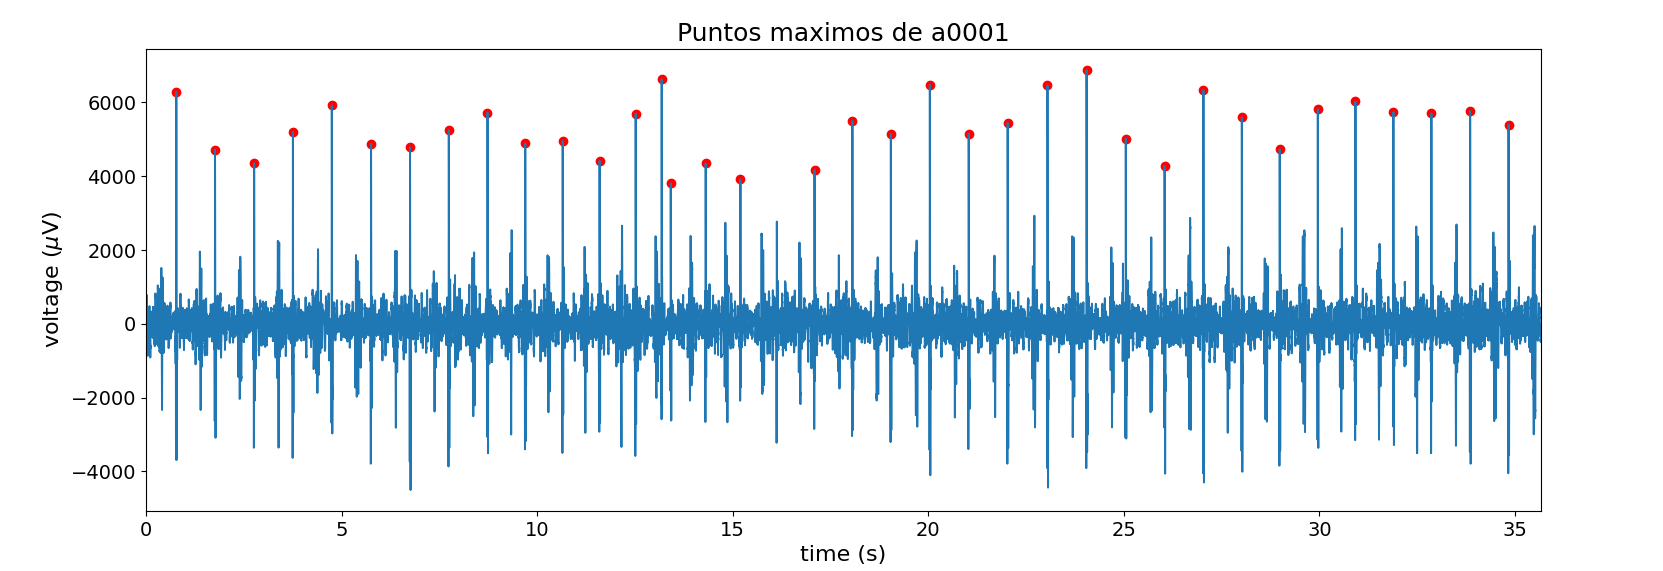


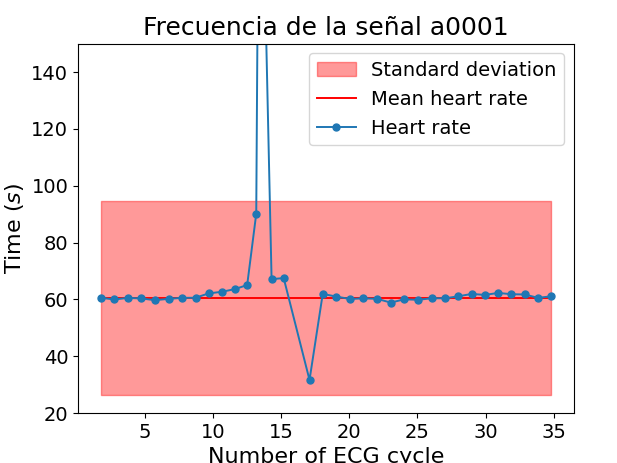

Latidos por minuto en la señal a0001.wav: 60.56187966130209

In [ ]:
import wave
import matplotlib.pyplot as plt
#%config InlineBackend.figure_formats = {'png', 'retina'}
plt.rcParams['axes.labelsize'] = 16 # fontsize for figure labels
plt.rcParams['axes.titlesize'] = 18 # fontsize for figure titles
plt.rcParams['font.size'] = 14 # fontsize for figure numbers
plt.rcParams['lines.linewidth'] = 1.4 # line width for plotting
#Function that extracts the number of recording channels, sampling rate, time and signal
#variable is the path and filename of the .wav file
def ecg(variable):
    record = wave.open(variable, 'r') # load the data
    # Get the number of channels, sample rate, etc.
    numChannels = record.getnchannels() # number of channels
    numFrames = record.getnframes() # number of frames
    sampleRate = record.getframerate() # sampling rate
    sampleWidth = record.getsampwidth()
    # Get wave data
    dstr = record.readframes(numFrames * numChannels)
    waveData = np.frombuffer(dstr, np.int16)
    # Get time window
    timeECG = np.linspace(0, len(waveData) / sampleRate,
num=len(waveData))
    return timeECG, waveData
#Test data
nice = ["a0001.wav","a0002.wav","a0003.wav","a0004.wav","a0005.wav","a0006.wav","a0007.wav","a0008.wav",\
        "a0009.wav","a0010.wav","a0011.wav","a0012.wav","a0013.wav","a0014.wav" ,"a0015.wav"]
#Obtaining data
for i in range(0, len(nice)):
    timeEMG, waveData = ecg(nice[i])
# Graficar los 15 audios
    plt.figure(figsize=(16,5))
    plt.xlabel(r'time (s)')
    plt.ylabel(r'voltage ($\mu$V)')
    plt.plot(timeEMG,waveData, 'b')
    plt.xlim(0,max(timeEMG))
    plt.title(nice[i])
    plt.show()
# Obtener grafico recortado del audio a0001 de forma que podamos
timeECG, waveData = ecg("a0001.wav")
n1 = .52
n2 = 1.3
m1 = int(n1*10000)
m2 = int(n2*10000)
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(timeECG[m1],timeECG[m2])
plt.title(r'Recorte: Ciclos completos a0001.wav')
plt.show()
# Un latido
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(.74,1.50)
plt.title("Un latido de a0001")
plt.show()
#Tres latidos
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(0.72,3.5)
plt.title("Tres latidos de a0001")
plt.show()




timeECG, waveData = ecg("a0001.wav")

def detecta_maximos_locales(timeECG, waveData, threshold_ratio=0.8):
    # If not all the R peaks are detected, lower the threshold_ratio
    # If components that are not R peaks (like T waves) are detected, up the threshold_ratio

    if len(timeECG) != len(waveData):  # Raises an error if two arrays have different lengths
        raise Exception("The two arrays have different lengths.")

    interval = max(waveData) - min(waveData)
    threshold = threshold_ratio * interval + min(waveData)
    maxima = []
    maxima_indices = []
    mxs_indices = []
    banner = False

    for i in range(0, len(waveData)):

        if waveData[i] >= threshold:  # If a threshold value is surpassed,
            # the indices and values are saved
            banner = True
            maxima_indices.append(i)
            maxima.append(waveData[i])

        elif banner == True and waveData[i] < threshold:  # If the threshold value is crossed
            # the index of the maximum value in the original array is saved
            index_local_max = maxima.index(max(maxima))
            mxs_indices.append(maxima_indices[index_local_max])
            maxima = []
            maxima_indices = []
            banner = False

    return mxs_indices

mxs_indices = detecta_maximos_locales(timeECG, waveData)
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.xlim(min(timeECG),max(timeECG))
plt.plot(timeECG, waveData)
plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
plt.show()


# Close up from an initial second to an end second
init_sec = 0
end_sec = 3
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.xlim(timeECG[init_sec*10000],timeECG[end_sec*10000])
plt.plot(timeECG[init_sec*10000:end_sec*10000], waveData[init_sec*10000:end_sec*10000])
plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
plt.show()

mean_bpm = 60*(len(mxs_indices)/(timeECG[-1]-timeECG[0]))
print("Beats per minute:", mean_bpm)


heart_rate = [(60/(timeECG[mxs_indices[i+1]]-timeECG[mxs_indices[i]])) \
              for i in range(0, len(mxs_indices)-1)]
time = timeECG[mxs_indices]

mean_vec = [mean_bpm for i in range(0, len(time)-1)]
std_vec_plus = [mean_bpm+stdev(heart_rate) for i in range(0, len(time)-1)]
std_vec_minus = [mean_bpm-stdev(heart_rate) for i in range(0, len(time)-1)]
plt.fill_between(time[1:], std_vec_minus, std_vec_plus, facecolor="red",
                 label = "Standard deviation", color='red', alpha=0.4)
plt.plot(time[1:], mean_vec, c="r", label = "Mean heart rate")
plt.plot(time[1:], heart_rate, markersize=5, marker = "o", label="Heart rate")
plt.ylim((20, 150))
plt.title("Heart frequency")
plt.xlabel(r'Number of ECG cycle')
plt.ylabel(r'Time ($s$)')
plt.legend()
plt.show()